In [1]:
import os
import numpy as np
from PIL import Image
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, SpatialDropout2D
from keras.preprocessing.image import ImageDataGenerator

C:\Users\memoi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\memoi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\memoi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\memoi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

# Step 1 : Load Data

* Load image data into nparray

In [2]:
filelist100 = glob.glob('money/100/*.jpg')
filelist500 = glob.glob('money/500/*.jpg')
filelist1000 = glob.glob('money/1000/*.jpg')

data_100 = np.array([np.array(Image.open(img)) for img in filelist100])
data_500 = np.array([np.array(Image.open(img)) for img in filelist500])
data_1000 = np.array([np.array(Image.open(img)) for img in filelist1000])

data = np.concatenate((data_100, data_500, data_1000), axis=0)

* Create image labels

In [3]:
label_100 = np.zeros(len(data_100), dtype=np.int)
label_500 = np.ones(len(data_500), dtype=np.int)
label_1000 = np.ones(len(data_1000), dtype=np.int)*2

label = np.concatenate((label_100, label_500, label_1000), axis=0)

label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Step 2 : Split data into train and test

In [4]:
data_train, data_test, label_train, label_test = train_test_split(data, label, train_size=0.5, random_state=1)

# Step 3 : Create model

In [5]:
EPOCHS = 30
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [6]:
model = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
        MaxPooling2D(2, 2),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(3)
    ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
____

# Step 4 : Fit model

In [7]:
history = model.fit(data_train, label_train ,epochs=EPOCHS, validation_data=(data_test, label_test))

Train on 30 samples, validate on 30 samples
Epoch 1/30
30/30 [==============================] - 0s 8ms/sample - loss: 21.6522 - acc: 0.3000 - val_loss: 1076.8960 - val_acc: 0.2000
Epoch 2/30
30/30 [==============================] - 0s 5ms/sample - loss: 870.4050 - acc: 0.4667 - val_loss: 907.9440 - val_acc: 0.4333
Epoch 3/30
30/30 [==============================] - 0s 5ms/sample - loss: 996.6824 - acc: 0.2333 - val_loss: 417.0063 - val_acc: 0.4333
Epoch 4/30
30/30 [==============================] - 0s 5ms/sample - loss: 413.8593 - acc: 0.2333 - val_loss: 290.4586 - val_acc: 0.2000
Epoch 5/30
30/30 [==============================] - 0s 5ms/sample - loss: 206.6860 - acc: 0.4667 - val_loss: 224.9865 - val_acc: 0.2000
Epoch 6/30
30/30 [==============================] - 0s 5ms/sample - loss: 141.9359 - acc: 0.4667 - val_loss: 139.3706 - val_acc: 0.2000
Epoch 7/30
30/30 [==============================] - 0s 5ms/sample - loss: 79.9940 - acc: 0.4667 - val_loss: 61.6631 - val_acc: 0.2000
Epoch 

# Step 5 : Draw accuracy and loss

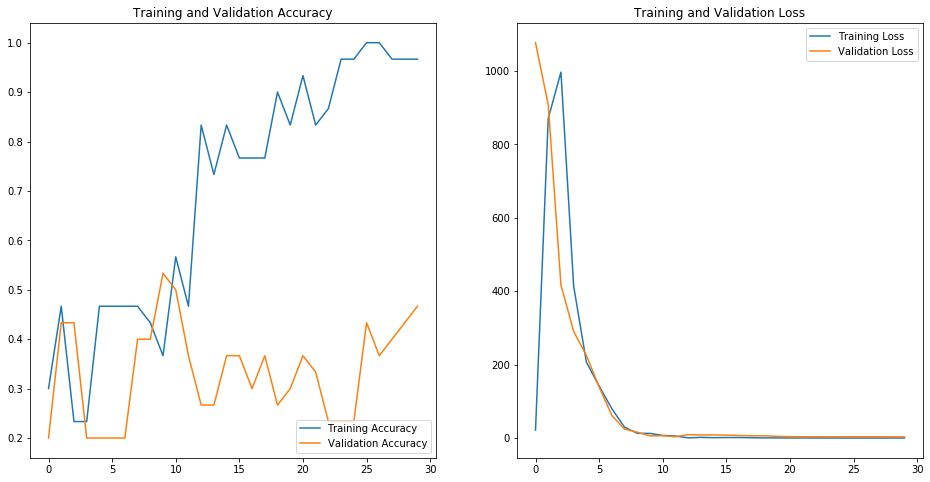

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
    
epochs_range = range(EPOCHS)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Step 6 : Add dropout

In [9]:
model_drop = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
        MaxPooling2D(2, 2),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dense(3)
    ])

model_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_drop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [10]:
history_drop = model_drop.fit(data_train, label_train ,epochs=EPOCHS, validation_data=(data_test, label_test))

Train on 30 samples, validate on 30 samples
Epoch 1/30
30/30 [==============================] - 0s 9ms/sample - loss: 10.8697 - acc: 0.4333 - val_loss: 525.0148 - val_acc: 0.4333
Epoch 2/30
30/30 [==============================] - 0s 5ms/sample - loss: 995.0838 - acc: 0.2333 - val_loss: 805.3134 - val_acc: 0.3667
Epoch 3/30
30/30 [==============================] - 0s 5ms/sample - loss: 845.4435 - acc: 0.3000 - val_loss: 508.6470 - val_acc: 0.3667
Epoch 4/30
30/30 [==============================] - 0s 5ms/sample - loss: 394.9572 - acc: 0.3000 - val_loss: 235.5163 - val_acc: 0.2333
Epoch 5/30
30/30 [==============================] - 0s 5ms/sample - loss: 102.7518 - acc: 0.4667 - val_loss: 258.6716 - val_acc: 0.2000
Epoch 6/30
30/30 [==============================] - 0s 5ms/sample - loss: 143.3971 - acc: 0.4667 - val_loss: 199.8963 - val_acc: 0.2000
Epoch 7/30
30/30 [==============================] - 0s 5ms/sample - loss: 116.2148 - acc: 0.4667 - val_loss: 124.0945 - val_acc: 0.2000
Epoch

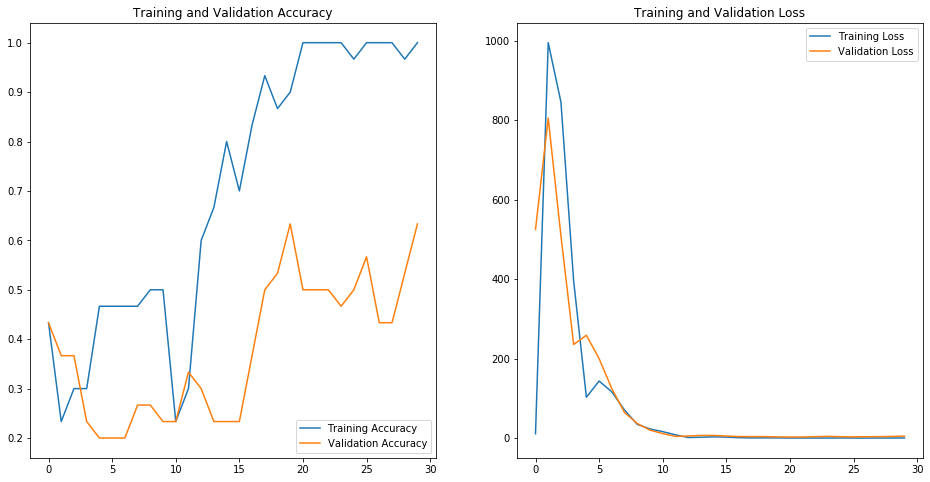

In [11]:
acc = history_drop.history['acc']
val_acc = history_drop.history['val_acc']
loss=history_drop.history['loss']
val_loss=history_drop.history['val_loss']
    
epochs_range = range(EPOCHS)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Step 7 : Do data argumentation

In [33]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

* Apply horizontal flip
* Randomly rotate the image
* Apply zoom augmentation

Found 30 images belonging to 3 classes.


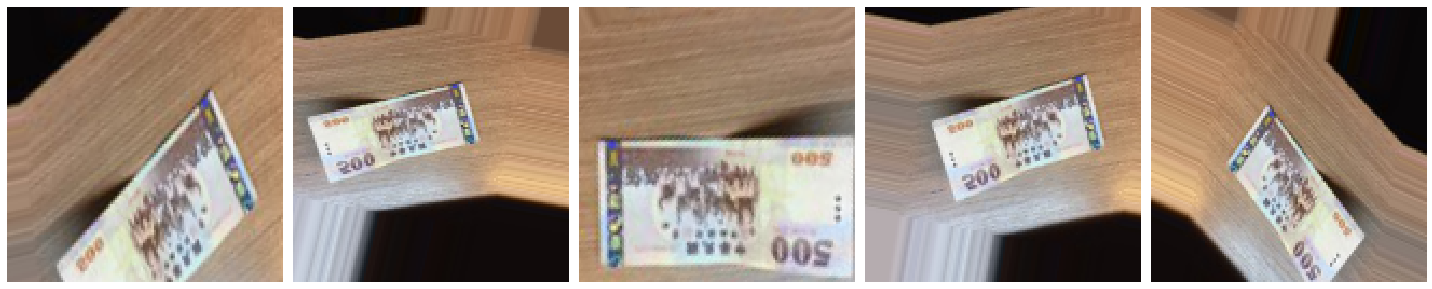

In [34]:
train_dir = os.path.join('money2', 'train')
validation_dir = os.path.join('money2', 'validation')

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=10,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [35]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=10,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')


Found 30 images belonging to 3 classes.


In [36]:
model_new = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
        MaxPooling2D(2, 2),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dense(3)
    ])
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model_new.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)            

In [37]:
history_new = model_new.fit_generator(image_gen_train.flow(data_train, label_train, batch_size=5),
                                       validation_data=(data_test, label_test), steps_per_epoch=len(data_train) // 5,
                                       epochs=EPOCHS)

Epoch 1/30
6/6 [==============================] - 1s 177ms/step - loss: 1.5183 - acc: 0.5000 - val_loss: 214.8125 - val_acc: 0.3667
Epoch 2/30
6/6 [==============================] - 0s 55ms/step - loss: 1.1341 - acc: 0.3000 - val_loss: 41.0243 - val_acc: 0.3667
Epoch 3/30
6/6 [==============================] - 0s 54ms/step - loss: 1.0726 - acc: 0.4000 - val_loss: 55.0417 - val_acc: 0.2000
Epoch 4/30
6/6 [==============================] - 0s 54ms/step - loss: 1.0596 - acc: 0.4667 - val_loss: 82.1388 - val_acc: 0.2667
Epoch 5/30
6/6 [==============================] - 0s 53ms/step - loss: 1.0489 - acc: 0.5000 - val_loss: 131.4118 - val_acc: 0.2000
Epoch 6/30
6/6 [==============================] - 0s 53ms/step - loss: 0.9945 - acc: 0.5667 - val_loss: 128.1570 - val_acc: 0.2667
Epoch 7/30
6/6 [==============================] - 0s 54ms/step - loss: 0.9813 - acc: 0.5000 - val_loss: 139.9455 - val_acc: 0.2000
Epoch 8/30
6/6 [==============================] - 0s 55ms/step - loss: 0.9559 - acc: 

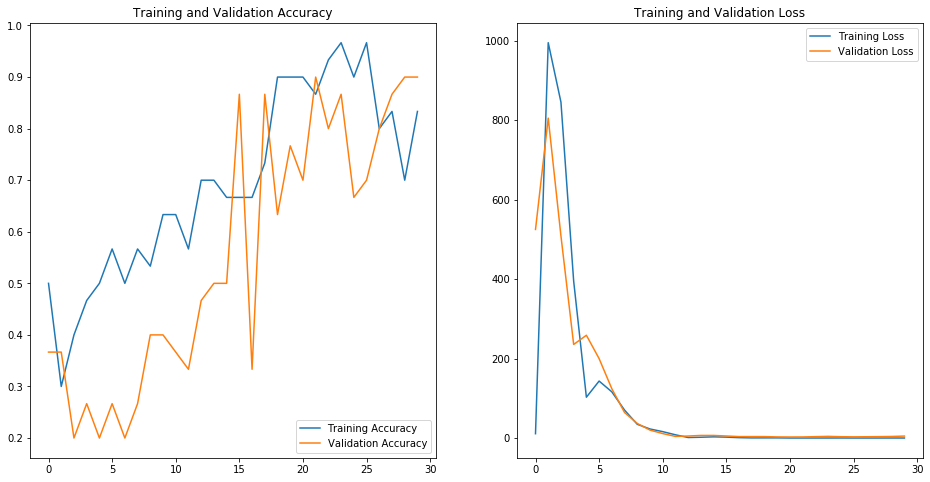

In [38]:
acc = history_new.history['acc']
val_acc = history_new.history['val_acc']
loss=history_drop.history['loss']
val_loss=history_drop.history['val_loss']
    
epochs_range = range(EPOCHS)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()